In [2]:
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib import collections as mc
import warnings
import numpy as np
import time
import os
from apgl.graph import VertexList
from scipy.io import mmread, mminfo
import networkx as nx 
warnings.filterwarnings('ignore')

In [3]:
def genGraphviz(g, x, filename):
    print("This function requires glam software...\n glam can be found in https://github.com/VIDILabs/glam ...\n")
    filename = filename+".dot"
    print ('Metrics for graph:', filename)
    output = open(filename, "w")
    output.write("graph G {\n")
    for i in range(len(x)):
        output.write(str(i) + " [x=\"" + str(x[i][0]) + "\", y=\"" + str(x[i][1]) + "\"];\n")
    visited = []
    e = 0
    for i,j in zip(*g.nonzero()):
        if i < j:
            t = i
            i = j
            j = t
        if i != j and [i,j] not in visited:
            output.write(str(i) + "--" + str(j) +";\n")
            e += 1
            visited.append([i, j])
    output.write("}")
    output.close()
    print("Total edges for glam:", e)
    command_crosslessness = "glam " + filename + " -m crosslessness" 
    command_edge_length = "glam " + filename + " -m edge_length_cv" 
    command_minangle = "glam " + filename + " -m min_angle" 
    command_shapedel = "glam " + filename + " -m shape_delaunay" 
    command_shapegab = "glam " + filename + " -m shape_gabriel" 
    print (os.popen(command_crosslessness).readlines()[2])
    print (os.popen(command_edge_length).readlines()[2])
    print (os.popen(command_minangle).readlines()[2])
    print (os.popen(command_shapedel).readlines()[2])
    print (os.popen(command_shapegab).readlines()[2])

In [4]:
def drawlinegraph(G, Xin, Xout, algo1="Algo1", algo2="Algo2"):
    gridsize = (1, 2)
    fig = plt.figure(figsize=(15, 6))
    axIN = plt.subplot2grid(gridsize, (0, 0))
    plt.axis('off')
    axIN.set_title(algo1)
    axOUT = plt.subplot2grid(gridsize, (0, 1))
    axOUT.set_title(algo2)

    #axIN.set_xlim(-400, -150)
    #axIN.set_ylim(-790, -500)
    axIN.set_xlim(min(Xin[:,0]), max(Xin[:,0]))
    axIN.set_ylim(min(Xin[:,1]), max(Xin[:,1]))
    axOUT.set_xlim(min(Xout[:,0]), max(Xout[:,0]))
    axOUT.set_ylim(min(Xout[:,1]), max(Xout[:,1]))
    linesIN = []
    linesOUT = []
    e = 0
    for i,j in zip(*graph.nonzero()):
        if i>j:
            linesIN.append([Xin[i], Xin[j]])
            linesOUT.append([Xout[i], Xout[j]])
            e += 1
    print ("Total edges = ", e, " Average Degree:", sum(d for n,d in G.degree()) / float(len(G)))
    lcIN = mc.LineCollection(linesIN, linewidths=.3, colors='#0000007f')
    lcOUT = mc.LineCollection(linesOUT, linewidths=.3, colors='#0000007f')
    axIN.add_collection(lcIN)
    axOUT.add_collection(lcOUT)
    plt.axis('off')

In [5]:
def drawnetworkxgraph(G, layout, ns, alp):
    plt.axis('off')
    nx.draw_networkx(G, layout, node_size=ns, with_labels=False, alpha=alp)
    

In [6]:
import s_gd2, random
import scipy.sparse.csgraph as csgraph
from fa2 import ForceAtlas2
#filename = "input/test.mtx"
#filename = "input/jagmesh1.mtx"
#filename = "input/blckhole.mtx"
#filename = "input/3elt_dual.mtx" 
#filename = "input/bcsstk28.mtx"
filename = "input/gridgena.mtx"
#filename = "input/tube2.mtx"
graph = mmread(filename)
G = nx.Graph()
for i in range(mminfo(filename)[0]):
    G.add_node(i)
for i,j in zip(*graph.nonzero()):
    if i > j:
        G.add_edge(i, j)

In [7]:
def readCoordinates(filename):
    corfile = open(filename)
    X = []
    for line in corfile.readlines():
        l = line.split("\t")
        X.append([float(l[0]), float(l[1])])
    X = np.array(X)
    corfile.close()
    return X

In [8]:
ouralgoSeq = readCoordinates("output/gridgena.mtxSEQU600.txt")
ouralgominb = readCoordinates("output/gridgena.mtxMINB64PARAOUTRAND600.txt")
fa2bh = readCoordinates("fa2output/gridgena.mtxFA2_iter_600_BH_True.txt")
fa2 = readCoordinates("fa2output/gridgena.mtxFA2_iter_600_BH_False.txt")

Total edges =  231561  Average Degree: 9.458804787386136


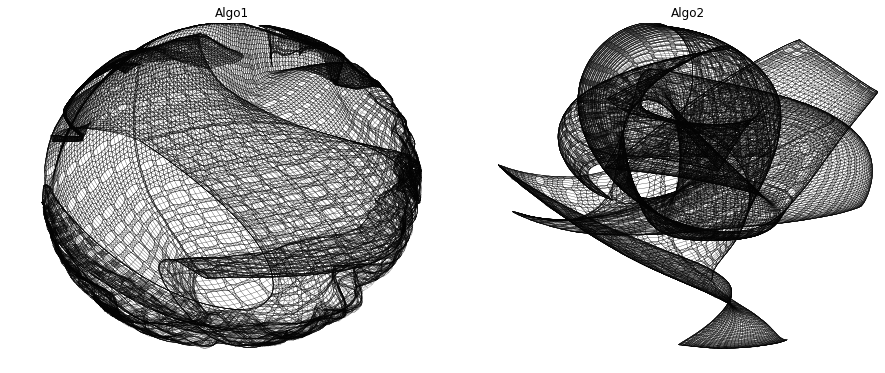

In [12]:
drawlinegraph(G, ouralgoSeq, fa2bh, "Algo1", "Algo2")